# Понижение размерности

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, Isomap
from sklearn.feature_selection import f_regression, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
import warnings
import umap
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
data_r = pd.read_csv('mumbai_houses_task_filtred.csv')
X_r = data_r.drop(axis=1, columns=['price'])
y_r = data_r['price']

In [3]:
data_classifier = pd.read_csv('csgo_filtred.csv')
X_cl = data_classifier.drop(columns=['bomb_planted'], axis=1)
y_cl = data_classifier['bomb_planted']
X_cl['map'] = X_cl['map'].str.strip().str.lower()
mapping = {
    'de_inferno': 1,
    'de_dust2': 2,
    'de_nuke': 3,
    'de_mirage': 4,
    'de_overpass': 5,
    'de_train': 6,
    'de_vertigo': 7,
    'unknown': 8,
    'de_cache': 9
}
X_cl['map'] = X_cl['map'].map(mapping)

In [ ]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=0.2, random_state=42)

scaler_r = StandardScaler()
X_r_train_scaled = scaler_r.fit_transform(X_r_train)
X_r_test_scaled = scaler_r.transform(X_r_test)

scaler_cl = StandardScaler()
X_cl_train_scaled = scaler_cl.fit_transform(X_cl_train)
X_cl_test_scaled = scaler_cl.transform(X_cl_test)

In [7]:
# Для регрессии
vt_r = VarianceThreshold(threshold=0.1)
X_r_train_vt = vt_r.fit_transform(X_r_train_scaled)
X_r_test_vt = vt_r.transform(X_r_test_scaled)
selected_features_r_vt = X_r.columns[vt_r.get_support()].tolist()
print("Регрессия - VarianceThreshold, отобранные признаки:", selected_features_r_vt)

# Для классификации
vt_cl = VarianceThreshold(threshold=0.1)
X_cl_train_vt = vt_cl.fit_transform(X_cl_train_scaled)
X_cl_test_vt = vt_cl.transform(X_cl_test_scaled)
selected_features_cl_vt = X_cl.columns[vt_cl.get_support()].tolist()
print("Классификация - VarianceThreshold, отобранные признаки:", selected_features_cl_vt)

Регрессия - VarianceThreshold, отобранные признаки: ['area', 'latitude', 'longitude', 'bedrooms', 'bathrooms', 'balcony', 'status', 'neworold', 'parking', 'furnished_status', 'lift', 'type_of_building']
Классификация - VarianceThreshold, отобранные признаки: ['time_left', 'ct_score', 't_score', 'map', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'health_lead', 'armor_lead', 'money_lead', 'helmets_lead', 'players_alive_lead']


In [8]:
# Для регрессии
kbest_r = SelectKBest(score_func=f_regression, k=5)
X_r_train_kbest = kbest_r.fit_transform(X_r_train_scaled, y_r_train)
X_r_test_kbest = kbest_r.transform(X_r_test_scaled)
selected_features_r_kbest = X_r.columns[kbest_r.get_support()].tolist()
print("Регрессия - SelectKBest, отобранные признаки:", selected_features_r_kbest)

# Для классификации
kbest_cl = SelectKBest(score_func=f_classif, k=5)
X_cl_train_kbest = kbest_cl.fit_transform(X_cl_train_scaled, y_cl_train)
X_cl_test_kbest = kbest_cl.transform(X_cl_test_scaled)
selected_features_cl_kbest = X_cl.columns[kbest_cl.get_support()].tolist()
print("Классификация - SelectKBest, отобранные признаки:", selected_features_cl_kbest)

Регрессия - SelectKBest, отобранные признаки: ['area', 'latitude', 'longitude', 'bedrooms', 'bathrooms']
Классификация - SelectKBest, отобранные признаки: ['time_left', 'ct_health', 't_health', 'ct_players_alive', 't_players_alive']


In [9]:
# Для регрессии
rfe_r = RFE(estimator=LinearRegression(), n_features_to_select=5)
X_r_train_rfe = rfe_r.fit_transform(X_r_train_scaled, y_r_train)
X_r_test_rfe = rfe_r.transform(X_r_test_scaled)
selected_features_r_rfe = X_r.columns[rfe_r.get_support()].tolist()
print("Регрессия - RFE, отобранные признаки:", selected_features_r_rfe)

# Для классификации
rfe_cl = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
X_cl_train_rfe = rfe_cl.fit_transform(X_cl_train_scaled, y_cl_train)
X_cl_test_rfe = rfe_cl.transform(X_cl_test_scaled)
selected_features_cl_rfe = X_cl.columns[rfe_cl.get_support()].tolist()
print("Классификация - RFE, отобранные признаки:", selected_features_cl_rfe)

Регрессия - RFE, отобранные признаки: ['area', 'latitude', 'longitude', 'bathrooms', 'parking']
Классификация - RFE, отобранные признаки: ['time_left', 'ct_health', 't_health', 'ct_armor', 'ct_players_alive']


In [11]:
# Для регрессии
pca_r = PCA(n_components=5)
X_r_train_pca = pca_r.fit_transform(X_r_train_scaled)
X_r_test_pca = pca_r.transform(X_r_test_scaled)
print("Регрессия - PCA, объясненная дисперсия:", pca_r.explained_variance_ratio_)

# Для классификации
pca_cl = PCA(n_components=5)
X_cl_train_pca = pca_cl.fit_transform(X_cl_train_scaled)
X_cl_test_pca = pca_cl.transform(X_cl_test_scaled)
print("Классификация - PCA, объясненная дисперсия:", pca_cl.explained_variance_ratio_)

Регрессия - PCA, объясненная дисперсия: [0.27269564 0.19322385 0.09280138 0.08809366 0.08105034]
Классификация - PCA, объясненная дисперсия: [0.26938913 0.16185553 0.12663701 0.08885918 0.06768915]


In [ ]:
# Для регрессии
kpca_r_poly = KernelPCA(n_components=5, kernel='poly')
X_r_train_kpca_poly = kpca_r_poly.fit_transform(X_r_train_scaled)
X_r_test_kpca_poly = kpca_r_poly.transform(X_r_test_scaled)

kpca_r_rbf = KernelPCA(n_components=5, kernel='rbf')
X_r_train_kpca_rbf = kpca_r_rbf.fit_transform(X_r_train_scaled)
X_r_test_kpca_rbf = kpca_r_rbf.transform(X_r_test_scaled)

kpca_r_sigmoid = KernelPCA(n_components=5, kernel='sigmoid')
X_r_train_kpca_sigmoid = kpca_r_sigmoid.fit_transform(X_r_train_scaled)
X_r_test_kpca_sigmoid = kpca_r_sigmoid.transform(X_r_test_scaled)

# Для классификации
# Уменьшение размера выборки
X_cl_train_sample, y_cl_train_sample = resample(X_cl_train_scaled, y_cl_train, n_samples=10000, random_state=42)
X_cl_test_sample = X_cl_test_scaled[:2000]

kpca_cl_poly = KernelPCA(n_components=5, kernel='poly')
X_cl_train_kpca_poly = kpca_cl_poly.fit_transform(X_cl_train_sample)
X_cl_test_kpca_poly = kpca_cl_poly.transform(X_cl_test_sample)

kpca_cl_rbf = KernelPCA(n_components=5, kernel='rbf')
X_cl_train_kpca_rbf = kpca_cl_rbf.fit_transform(X_cl_train_sample)
X_cl_test_kpca_rbf = kpca_cl_rbf.transform(X_cl_test_sample)

kpca_cl_sigmoid = KernelPCA(n_components=5, kernel='sigmoid')
X_cl_train_kpca_sigmoid = kpca_cl_sigmoid.fit_transform(X_cl_train_sample)
X_cl_test_kpca_sigmoid = kpca_cl_sigmoid.transform(X_cl_test_sample)

In [16]:
# Для регрессии
tsne_r = TSNE(n_components=2, random_state=42)
X_r_train_tsne = tsne_r.fit_transform(X_r_train_scaled)
X_r_test_tsne = tsne_r.fit_transform(X_r_test_scaled)

# Для классификации
tsne_cl = TSNE(n_components=2, perplexity=30, random_state=42)
X_cl_train_tsne = tsne_cl.fit_transform(X_cl_train_sample)
X_cl_test_tsne = tsne_cl.fit_transform(X_cl_test_sample)

In [18]:
# Для регрессии
isomap_r = Isomap(n_components=5)
X_r_train_isomap = isomap_r.fit_transform(X_r_train_scaled)
X_r_test_isomap = isomap_r.transform(X_r_test_scaled)

# Для классификации
isomap_cl = Isomap(n_components=5)
X_cl_train_isomap = isomap_cl.fit_transform(X_cl_train_sample)
X_cl_test_isomap = isomap_cl.transform(X_cl_test_sample)

c:\Users\motyn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\motyn\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [52]:
def custom_pca(X, n_components=2):
    # 1. Центрирование данных
    X_centered = X - np.mean(X, axis=0)
    
    # 2. Вычисление ковариационной матрицы
    cov_matrix = np.cov(X_centered.T)
    
    # 3. Нахождение собственных значений и векторов
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # 4. Сортировка собственных значений и векторов по убыванию
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # 5. Выбор первых n_components векторов
    top_eigenvectors = eigenvectors[:, :n_components]
    
    # 6. Проецирование данных
    X_transformed = np.dot(X_centered, top_eigenvectors)
    
    # 7. Вычисление доли объясненной дисперсии
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    
    return X_transformed, explained_variance_ratio[:n_components]

Доля объясненной дисперсии (2 компоненты): [0.266882   0.16450748]
Суммарная объясненная дисперсия: 0.43138948432601554


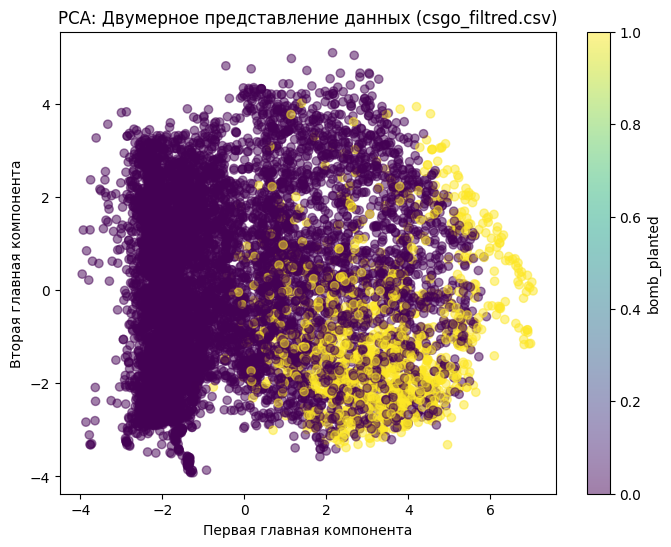

In [55]:
X_cl_sample, y_cl_sample = resample(X_cl, y_cl, n_samples=10000, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_cl_scaled = scaler.fit_transform(X_cl_sample)

X_pca, explained_variance_ratio = custom_pca(X_cl_scaled, n_components=2)
print("Доля объясненной дисперсии (2 компоненты):", explained_variance_ratio)
print("Суммарная объясненная дисперсия:", sum(explained_variance_ratio))

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cl_sample, cmap='viridis', alpha=0.5)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA: Двумерное представление данных (csgo_filtred.csv)')
plt.colorbar(label='bomb_planted')
plt.show()

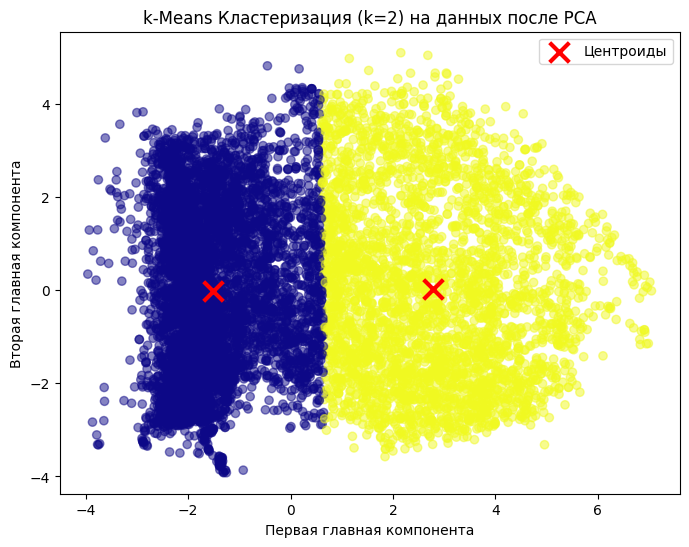

In [57]:
from custom_k_means import CustomKMeans

k = 2  # Бинарная переменная bomb_planted
kmeans = CustomKMeans(n_clusters=k, max_iter=300, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', alpha=0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Центроиды')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title(f'k-Means Кластеризация (k={k}) на данных после PCA')
plt.legend()
plt.show()

In [50]:
# Функция для оценки регрессии
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Функция для оценки классификации
def evaluate_classification(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, f1

# Словари для хранения результатов
results_r = {}
results_cl = {}

# Регрессия
methods_r = {
    'VarianceThreshold': (X_r_train_vt, X_r_test_vt),
    'SelectKBest': (X_r_train_kbest, X_r_test_kbest),
    'RFE': (X_r_train_rfe, X_r_test_rfe),
    'PCA': (X_r_train_pca, X_r_test_pca),
    'KernelPCA_poly': (X_r_train_kpca_poly, X_r_test_kpca_poly),
    'KernelPCA_rbf': (X_r_train_kpca_rbf, X_r_test_kpca_rbf),
    'KernelPCA_sigmoid': (X_r_train_kpca_sigmoid, X_r_test_kpca_sigmoid),
    't-SNE': (X_r_train_tsne, X_r_test_tsne),
    'Isomap': (X_r_train_isomap, X_r_test_isomap)
}

for method, (X_train, X_test) in methods_r.items():
    model = LinearRegression()
    model.fit(X_train, y_r_train)
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_regression(y_r_test, y_pred)
    results_r[method] = {'MSE': mse, 'R2': r2}

# Классификация
methods_cl = {
    'VarianceThreshold': (X_cl_train_vt, X_cl_test_vt),
    'SelectKBest': (X_cl_train_kbest, X_cl_test_kbest),
    'RFE': (X_cl_train_rfe, X_cl_test_rfe),
    'PCA': (X_cl_train_pca, X_cl_test_pca),
    'KernelPCA_poly': (X_cl_train_kpca_poly, X_cl_test_kpca_poly),
    'KernelPCA_rbf': (X_cl_train_kpca_rbf, X_cl_test_kpca_rbf),
    'KernelPCA_sigmoid': (X_cl_train_kpca_sigmoid, X_cl_test_kpca_sigmoid),
    't-SNE': (X_cl_train_tsne, X_cl_test_tsne),
    'Isomap': (X_cl_train_isomap, X_cl_test_isomap)
}

# Обучение и оценка для классификации
for method, (X_train, X_test) in methods_cl.items():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_cl_train[:len(X_train)])
    y_pred = model.predict(X_test)
    acc, f1 = evaluate_classification(y_cl_test[:len(X_test)], y_pred)
    results_cl[method] = {'Accuracy': acc, 'F1': f1}

In [51]:
# Таблица для регрессии
results_r_df = pd.DataFrame(results_r).T
print("\nРезультаты регрессии (LinearRegression):")
print(results_r_df)

# Таблица для классификации
results_cl_df = pd.DataFrame(results_cl).T
print("\nРезультаты классификации (RandomForestClassifier):")
print(results_cl_df)


Результаты регрессии (LinearRegression):
                            MSE        R2
VarianceThreshold  3.245553e+14  0.672803
SelectKBest        3.243377e+14  0.673022
RFE                3.240070e+14  0.673356
PCA                3.944054e+14  0.602384
KernelPCA_poly     5.303766e+14  0.465306
KernelPCA_rbf      7.745624e+14  0.219133
KernelPCA_sigmoid  4.265271e+14  0.570001
t-SNE              9.189141e+14  0.073606
Isomap             8.206806e+14  0.172639

Результаты классификации (RandomForestClassifier):
                   Accuracy        F1
VarianceThreshold  0.976293  0.900700
SelectKBest        0.979079  0.913074
RFE                0.979165  0.913585
PCA                0.920346  0.633819
KernelPCA_poly     0.873000  0.000000
KernelPCA_rbf      0.873000  0.007812
KernelPCA_sigmoid  0.874500  0.000000
t-SNE              0.871000  0.007692
Isomap             0.869000  0.007576
